<a href="https://colab.research.google.com/github/Deepak5j/FraudDetection/blob/master/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fraud Detection**

Our Tasks
- Explore the dataset/Visualize
- Decide which features are important
- Perform Machine Learning
- Test the model on the testing set

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale #all feature  on same scale, for acuracy
import random

In [80]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,46472.0,-1.729480,-0.643126,1.762726,-0.779430,-0.527628,1.807003,-0.416822,1.290253,0.944199,-1.751217,-0.809885,-0.144004,-2.069741,-0.088072,-0.276376,-1.199129,1.511550,-2.031776,-1.731981,-0.031863,0.296196,0.674445,0.259518,-0.920810,-0.219966,1.164257,-0.081738,-0.046960,161.84,0
1,86619.0,-0.614964,1.537793,-0.033658,-0.438880,1.360029,-0.751056,1.538492,-0.561772,-0.122889,-0.585450,-0.295134,0.308655,1.000938,-1.464389,0.095767,-0.452204,0.578422,-0.026496,0.418562,0.204108,-0.198319,-0.285150,-0.267759,0.651190,0.081610,-0.475545,-0.189068,0.016859,7.38,0
2,147782.0,1.271450,-1.940979,-1.067839,0.756476,-0.770753,0.724987,-0.302194,0.114809,-0.372701,0.881441,0.009893,0.640159,0.040754,0.105874,-0.916174,-1.143047,-0.489072,1.487113,-0.614162,0.174172,-0.482516,-1.736581,0.130072,0.100766,-0.600041,-1.129271,-0.008651,0.038294,411.18,0
3,158990.0,0.776148,0.585031,-0.716941,-0.360733,0.574462,-0.349398,0.151706,-0.800480,-0.041904,-0.677864,1.182002,0.567235,-0.700288,-0.503022,-0.710278,0.596026,0.278077,0.081001,-0.275734,-0.328518,0.427835,-1.264508,0.111451,0.586414,0.490681,0.195993,-0.000076,0.086993,1.29,0
4,140673.0,2.300013,-1.400928,-0.972824,-1.473077,-1.410575,-1.046066,-1.051795,-0.244052,-1.057016,1.612871,-1.320439,-1.419827,-0.693059,-0.173376,-0.090406,-0.537260,0.537133,0.028665,-0.071813,-0.504337,-0.188189,-0.074258,0.220499,-0.157334,-0.188006,-0.150537,0.000524,-0.054326,20.00,0


In [81]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


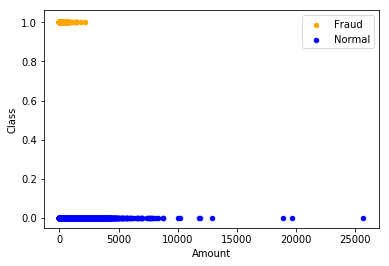

In [82]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [0]:
from sklearn import  linear_model
from sklearn.model_selection import train_test_split

In [0]:
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)


In [90]:
logistic = linear_model.LogisticRegression(C=1e5)#100,000 regulate overfitting
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9989566927159095


In [91]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]
